# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Alejandro Casado Figueredo  <br>
Url: https://github.com/alexcefe02/VIU/blob/99a84a1c51ed18ca33359d5ac5081470d91e49ae/AO/SeminarioAlejandro.ipynb<br>
Problema:
> 1. Sesiones de doblaje <br>

Descripción del problema:

Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las
tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de
doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de
grabación independientemente del número de tomas que se graben. No es posible grabar más
de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los
servicios de los actores de doblaje sea el menor posible. Los datos son:

    Número de actores: 10
    Número de tomas : 30

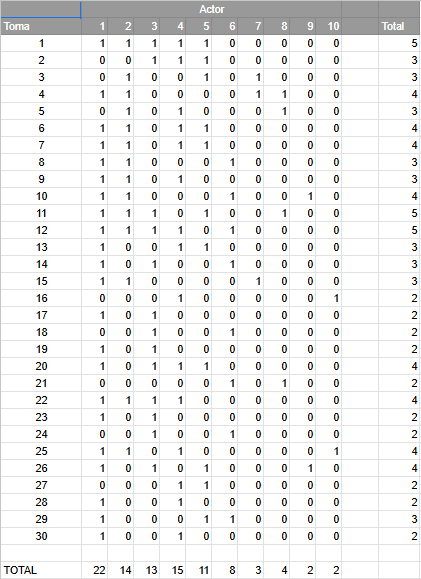

        - 1 indica que el actor participa en la toma
        - 0 en caso contrario




                                        

Nuestra estrategia se fundamentará en un Greedy con minimización de costes, la cual está caracterizada por:

- Tomamos la lista de 30 tomas junto a su matriz de participación 30x10.
- En cada paso / iteración creamos un nuevo día, agregamos tomas al día mientras no pasemos el máximo (6) y nos centremos en minimizar los actores requeridos
- Repetimos la jugada hasta acabar con la asignación de tomas

In [419]:
# Importamos toda la documentación necesaria
import numpy as np
import pandas as pd
import random
from os import path as osp

# Cargamos nuestro dataset (matriz tomas x actores)
ruta_archivo = osp.join("Matriz.csv")
df = pd.read_csv(ruta_archivo, sep=',', header=1, index_col=0, engine='python')

# Esta matriz la trataremos como un array(numpy) y eliminaremos las columnas innecesarias
df = df.iloc[:-2, :-2]
sesiones = np.array(df)

def organizar_sesiones(sesiones):
    """
    Organiza las tomas en días. Cada día incluye hasta 6 tomas, intentando 
    minimizar el número total de actores requeridos.
    
    Parámetro:
    - sesiones: matriz binaria donde [i,j] = 1 si el actor j participa en la toma i.
    
    Devuelve:
    - Lista de listas, donde cada sublista representa las tomas de un día.
    """
    dias = []
    num_tomas = sesiones.shape[0]
    sin_asignar = set(range(num_tomas))
    

    while sin_asignar:
        # Elegimos la toma con menor número de actores como semilla del día
        cuenta_actores_por_toma = {toma: np.sum(sesiones[toma]) for toma in sin_asignar}
        minimo_actores = min(cuenta_actores_por_toma.values())
        candidatas = [toma for toma, cuenta in cuenta_actores_por_toma.items() if cuenta == minimo_actores]
        toma_semilla = np.random.choice(candidatas)

        tomas_del_dia = [toma_semilla]
        sin_asignar.remove(toma_semilla)

        # Inicializamos el conjunto de actores del día
        actores_del_dia = set(np.where(sesiones[toma_semilla] == 1)[0])

        # Añadimos hasta 5 tomas adicionales al día (máximo 6 tomas por día)
        for _ in range(5):
            mejor_toma = None
            menor_incremento = None

            for toma in sin_asignar:
                actores_en_toma = set(np.where(sesiones[toma] == 1)[0])
                # Calculamos cuántos actores nuevos se incorporarían con esta toma
                incremento = len(actores_del_dia | actores_en_toma) - len(actores_del_dia)

                if mejor_toma is None or incremento < menor_incremento:
                    mejor_toma = toma
                    menor_incremento = incremento

            # Elegimos la toma que menor número de actores nuevos aporta
            if mejor_toma is not None:
                tomas_del_dia.append(mejor_toma)
                actores_del_dia |= set(np.where(sesiones[mejor_toma] == 1)[0])
                sin_asignar.remove(mejor_toma)
            
            # En caso de no poder agregar más tomas, abandonamos el bucle
            else:
                break

        dias.append(tomas_del_dia)
    return dias

def calcular_coste(dias, sesiones):
    """
    Calcula el número total de días-actor requeridos.
    Es decir, suma cuántos actores trabajan cada día.
    Esto equivaldria a ser el coste final.

    Parámetros:
    - dias: lista de listas de tomas agrupadas por día
    - sesiones: matriz binaria de tomas x actores

    Retorna:
    - Entero con el total de días-actor (coste)
    """
    total_actor_dias = 0
    dia = 0
    for tomas_del_dia in dias:
        actores = set()
        for toma in tomas_del_dia:
            actores |= set(np.where(sesiones[toma] == 1)[0]) # Unión de actores del día
        total_actor_dias += len(actores)
        dia += 1
    return total_actor_dias


# Inicializamos el mejor coste muy alto, para poder comparar
total_actor_dias = 99999
mejor_distribucion = []

print('Distribución de las tomas por día, siendo 6 las tomas que se realizan cada día:')
print()

# Ejecutamos el algoritmo 1000 veces con distintas semillas aleatorias
for intento in range(1000):
    dias_temp = organizar_sesiones(sesiones)
    coste_temp = calcular_coste(dias_temp, sesiones)

    # Nos quedamos con la mejor distribución encontrada
    if coste_temp < total_actor_dias:
        total_actor_dias = coste_temp
        mejor_distribucion = dias_temp

# Bloque de impresión. Mostramos la mejor forma de distribuir las tomas
dia = 1
for tomas_del_dia in mejor_distribucion:
    descripciones = []
    for toma in tomas_del_dia:
        num_actores = int(np.sum(sesiones[toma])) # Numero de actores que hay en la toma
        descripciones.append(f"{toma} ({num_actores} actores)") # Damos formato a la futura impresión -> toma (X actores)
    print(f"Tomas del día {dia}: [{', '.join(descripciones)}]") # Imprimimos las tomas de un día dentro del bucle for, así se imprimirá iterativamente cada uno de los días
    dia += 1
print()
print("Total días-actor, es decir, el coste total de la distribucion:", total_actor_dias) # Total del coste

Distribución de las tomas por día, siendo 6 las tomas que se realizan cada día:

Tomas del día 1: [18 (2 actores), 16 (2 actores), 22 (2 actores), 13 (3 actores), 17 (2 actores), 23 (2 actores)]
Tomas del día 2: [26 (2 actores), 1 (3 actores), 12 (3 actores), 19 (4 actores), 27 (2 actores), 29 (2 actores)]
Tomas del día 3: [20 (2 actores), 4 (3 actores), 7 (3 actores), 8 (3 actores), 3 (4 actores), 14 (3 actores)]
Tomas del día 4: [15 (2 actores), 24 (4 actores), 5 (4 actores), 6 (4 actores), 0 (5 actores), 21 (4 actores)]
Tomas del día 5: [28 (3 actores), 2 (3 actores), 9 (4 actores), 25 (4 actores), 10 (5 actores), 11 (5 actores)]

Total días-actor, es decir, el coste total de la distribucion: 28


#### (*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>




Estamos dividiendo 30 tomas en 5 grupos de 6 tomas cada uno, donde:

- No importa el orden de los grupos

- No importa el orden de las tomas dentro de cada grupo

Este es un clásico problema de partición de un conjunto en subconjuntos del mismo tamaño, y el número total de combinaciones posibles es:

Total de particiones = 30!/((6!^5)*5!) ≈ **7.9 * 10^15**

Es un número extremadamente alto, y eso es por que sin restricciones se comprueban todas las posibilidades, incluso las que se sabe que no son óptimas, y es gracias a las restricciones que se acotan las posibilidades.
La solución más óptima posible se encuentra en esta casuística, la cual es **llevar a todos los actores a hacer todas las tomas en un mismo día** por lo que solo tendría un coste 10 (pagar únicamente a cada actor por presentarse allí)

​


#### ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones?


Esto implica contar solo las combinaciones de agrupaciones de tomas en días que:

- No asignen más de 6 tomas a un mismo día

- Sean completas: todas las 30 tomas deben ser asignadas a algún día

- Pueden tener menos de 6 tomas si no forzamos el máximo

- Cumplen con las restricciones implícitas de coste: minimizar días-actor

- No hay tomas simultáneas: cada toma ocurre en un único día

- No se permiten repeticiones ni omisiones

A diferencia del caso anterior, tenemos un **espacio de posibilidades más acotado**, lo cuál nos ayudará a encontrar alguna solución más rápido.

En nuestro caso con el algoritmo heurístico (greedy) encontramos una buena solución (aunque no sabemos si la más óptima, pues recorrer todo el espacio de soluciones es inviable computacionalmente hablando)
la cual asume un coste aproximado entre 26 y 34. Como ya hemos dicho, la más óptima se encuentra en la casuística anterior, pero aquí si que se encontraran la gran mayoría de soluciones viables para el problema.

Modelo para el espacio de soluciones<br>

#### (*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, argumentalo)


Debido a la complejidad del problema, hemos utilizado más de un tipo de estructura para el mismo:

- Para los datos de entrada hemos empleado un **numpy.array**, el cual nos ayudaba pues debido a su formato, cada columna es un actor y cada fila una toma. Además, podemos marcar como 1 si el actor participa y como 0 si no participa, lo cual son valores binarios muy útiles para matrices de este tipo. Además de esto, la librería numpy y sus matrices nos permiten realizar una gran cantidad de operaciones para solucionar el problema como:

    - np.sum
    - np.where

- En cuanto a la representación de la solución hemos optado por una **lista de listas**, básicamente una lista. Esta nos ayuda bastante pues agrupa las tomas en días según la solución candidata, y al igual que la matriz tenemos varias opciones dentro de la estructura. Cada sublista representa un día, y cada uno de los elementos de una sublista es el índice de una toma. Además, son estructuras muy naturales de tratar e imprimir, y nos facilita mucho el cálculo del coste final del problema

Según el modelo para el espacio de soluciones<br>

#### (*)¿Cual es la función objetivo?

La función objetivo en este problema es: **Minimizar el número total de días-actor (el coste)**

Cada vez que un actor tiene que ir al estudio a grabar al menos una toma en un día, cuenta como 1 día-actor, sin importar cuántas tomas grabe ese día. Por tanto, cuantos más actores haya que mover cada día, mayor será el coste total.

Esto se representa en nuestro código con la función **calcular_coste**, la cual:
- Suma, para cada día, el número de actores distintos que participan.
- Devuelve el total, que es el coste en días-actor.

Además, por ello se ha afirmado que el mejor caso (utópico pues sin retricciones obligatorias) sería que todos los actores grabaran en un solo día todas las tomas, por lo que el coste sería 10 (1 por cada desplazamiento de actor), y no 27, como nos resulta en el mejor caso con nuestro greedy.

#### (*)¿Es un problema de maximización o minimización?

Se trata de un problema de **minimización**, pues nuestro objetivo detrás del mismo es minimizar el coste (desplazamientos de actores por día) en base a unas restricciones impuestas.

Si fuera de maximizacion estaríamos hablando, por ejemplo, de intentar expandir esas toma en cada día (+6 tomas) o expandir esos días de grabación (1 toma por dia, para que sean 30 días).

Diseña un algoritmo para resolver el problema por fuerza bruta

In [ ]:
"""""
from itertools import combinations

ruta_archivo = osp.join("Matriz.csv")
df = pd.read_csv(ruta_archivo, sep=',', header=1, index_col=0, engine='python')


df = df.iloc[:-2, :-2]
sesiones = np.array(df)

def calcular_coste(dias, sesiones):

    total_actor_dias = 0
    for tomas_del_dia in dias:
        actores = set()
        for toma in tomas_del_dia:
            actores |= set(np.where(sesiones[toma] == 1)[0])
        total_actor_dias += len(actores)
    return total_actor_dias

def fuerza_bruta(sesiones):

    from itertools import combinations

    num_tomas = sesiones.shape[0]
    indices = list(range(num_tomas))

    mejor_coste = float('inf')
    mejor_distribucion = None

    def generar_particiones(tomas_restantes, actual=[]):
        if not tomas_restantes:
            yield actual
        else:
            for r in range(1, min(6, len(tomas_restantes)) + 1):
                for grupo in combinations(tomas_restantes, r):
                    resto = [t for t in tomas_restantes if t not in grupo]
                    yield from generar_particiones(resto, actual + [list(grupo)])

    for distribucion in generar_particiones(indices):
        coste = calcular_coste(distribucion, sesiones)
        if coste < mejor_coste:
            mejor_coste = coste
            mejor_distribucion = distribucion

    return mejor_distribucion, mejor_coste

mejor_distribucion, mejor_coste = fuerza_bruta(sesiones)

print("Mejor distribución (por fuerza bruta):")
dia = 1
for tomas in mejor_distribucion:
    actores_dia = set()
    for toma in tomas:
        actores_dia |= set(np.where(sesiones[toma] == 1)[0])
    print(f"Día {dia}: Tomas {tomas} → Actores: {sorted(actores_dia)}")
    dia += 1
print("\nCoste total (días-actor):", mejor_coste)
"""""

KeyboardInterrupt: 

**COMO SE PUEDE COMPROBAR, NUESTRO PROBLEMA NO ES VIABLE REALIZARLO MEDIANTE FUERZA BRUTA, PUES EL PODER CÓMPUTO PARA EXPLORAR CADA POSIBLE INSTANCIA DE SOLUCIÓN DE NUESTRO ORDENADOR NO ES SUFICIENTE PARA LO QUE NOS SOLICITA. PROCEDEREMOS A PROBAR A REALIZAR ESTA MISMA TÁCTICA, PERO EN VEZ DE LEER NUESTRA MATRIZ DIA-ACTOR (30*10) LO HAREMOS CON UN EJEMPLO DE 7 TOMAS, QUE SI QUE ES VIABLE COMPUTACIONALMENTE.**

In [38]:
from itertools import combinations

"""""

Como es computacionalmente inviable lo que se pide de realizar por fuerza bruta una solución para nuestro problema,
se ha pensado en realizar esa misma táctica pero para una ejemplificación del problema en base a 7 tomas, lo cual nos
sirve perfectamente para ver como sería el funcionamiento y los resultados.

"""""

# Cada fila representa una toma, cada columna si un actor participa (1) o no (0)
sesiones = np.array([
    [1, 0, 1, 0, 1],  # Toma 0 -> Trabajan actor 1,3 y 5
    [1, 1, 0, 0, 0],  # Toma 1 -> Trabajan actor 1 y 2
    [0, 1, 1, 0, 0],  # Toma 2 -> Trabajan actor 2 y 3
    [0, 0, 1, 1, 0],  # Toma 3 -> Trabajan actor 3 y 4
    [1, 0, 0, 1, 1],  # Toma 4 -> Trabajan actor 1, 4 y 5
    [0, 1, 0, 1, 1],  # Toma 5 -> Trabajan actor 2, 4 y 5
    [0, 0, 0, 1, 0],  # Toma 6 -> Trabaja actor 4
])

def calcular_coste(dias, sesiones):
    """
    Calcula el coste total en días-actor para una distribución dada de tomas.
    'dias' es una lista de listas, cada sublista contiene índices de tomas en un día.
    'sesiones' es una matriz numpy donde filas=tomas, columnas=actores (1 si actor participa).
    """
    total_actor_dias = 0
    for tomas_del_dia in dias:
        actores = set()
        for toma in tomas_del_dia:
            actores |= set(np.where(sesiones[toma] == 1)[0])
        total_actor_dias += len(actores)
    return total_actor_dias

def fuerza_bruta(sesiones):
    """
    Busca la mejor distribución de tomas en días para minimizar el coste total usando fuerza bruta.
    'sesiones' es la matriz numpy con tomas vs actores.
    """
    from itertools import combinations

    num_tomas = sesiones.shape[0]
    indices = list(range(num_tomas))

    mejor_coste = float('inf')
    mejor_distribucion = None

    # Generar todas las particiones posibles de 6 tomas en grupos de hasta 6
    def generar_particiones(tomas_restantes, actual=[]):
        if not tomas_restantes:
            yield actual
        else:
            for r in range(1, min(6, len(tomas_restantes)) + 1):
                for grupo in combinations(tomas_restantes, r):
                    resto = [t for t in tomas_restantes if t not in grupo]
                    yield from generar_particiones(resto, actual + [list(grupo)])

    for distribucion in generar_particiones(indices):
        coste = calcular_coste(distribucion, sesiones)
        if coste < mejor_coste:
            mejor_coste = coste
            mejor_distribucion = distribucion

    return mejor_distribucion, mejor_coste

# Ejecución
mejor_distribucion, mejor_coste = fuerza_bruta(sesiones)

# Mostrar resultados
print("Mejor distribución (por fuerza bruta):")
dia = 1
for tomas in mejor_distribucion:
    actores_dia = set()
    for toma in tomas:
        actores_dia |= set(np.where(sesiones[toma] == 1)[0])
    print(f"Día {dia}: Tomas {tomas} → Actores: {sorted(actores_dia)}")
    dia += 1
print("\nCoste total (días-actor):", mejor_coste)

Mejor distribución (por fuerza bruta):
Día 1: Tomas [6] → Actores: [3]
Día 2: Tomas [0, 1, 2, 3, 4, 5] → Actores: [0, 1, 2, 3, 4]

Coste total (días-actor): 6


Este enfoque es **útil para problemas muy pequeños o para validar soluciones de otros métodos.**
Para casos reales (30 tomas, 10 actores), es necesario usar métodos heurísticos, metaheurísticas o algoritmos aproximados que reduzcan el espacio de búsqueda y ofrezcan soluciones cercanas al óptimo en tiempo razonable.



#### Calcula la complejidad del algoritmo por fuerza bruta

El algoritmo genera todas las particiones posibles con grupos de tamaño entre 1 y 6 y para cada partición calcula el coste (sumando actores), y selecciona la mejor.

- El número de particiones posibles de un conjunto se mide por el número de Bell, que crece muy rápido (superexponencial). Para un conjunto de tamaño n, el número de particiones es: **B(n).**
- Aquí no es cualquier partición, sino particiones con grupos de tamaño máximo 6. Este es un subconjunto de todas las particiones, pero sigue siendo muy grande y crece muy rápido con n.
- Generar todas estas particiones con el código recursivo que hace combinaciones de tamaños 1 a 6, es equivalente a enumerar todas las particiones restringidas, que sigue siendo exponencial en n.

Ya que el crecimiento es superexponencial y además, en cada partición además se calcula el coste, la complejidad temporal resulta en: **O(B(n) x n)**, y como hemos podido comprobar, esta complejidad para valores medianamente altos como el de nuestro problema es INVIABLE.

#### (*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

El algoritmo voraz (greedy) propuesto inicialmente mejora a este algoritmo por fueza bruta por los siguientes motivos expuestos en la comparación entre ambos:

**Fuerza bruta:**
- El algoritmo por fuerza bruta explora todas las particiones posibles de 30 tomas en días, donde cada día tiene un mínimo de 1 y un máximo de 6 tomas.
- El número de particiones (particiones de conjunto con restricciones) es astronómico. En términos simples, el número de maneras de agrupar 𝑛 elementos en grupos de tamaño 6 es enorme, crece factorialmente o combinatoriamente de forma explosiva.
- Esto implica que el tiempo de ejecución es impracticable para n=30.

**Algoritmo propuesto:**
- En cada iteración solo evalúa un subconjunto pequeño de posibilidades (por ejemplo, para elegir la siguiente toma, evalúa todas las tomas no asignadas, pero solo una toma se añade al día).
- Por tanto, la complejidad está en el orden de iterar todas las tomas y para cada toma hacer un análisis de actores (algo en torno a O(n×m) donde n es número de tomas y m el número de actores).
- No explora exhaustivamente todas las combinaciones, sino que construye una solución válida con heurística.

Además, tras la ejecución en repetidas ocasiones de mi algoritmo probando la versión original de mínimo 1 toma y máximo 6, he llegado a la conclusión de que siempre me arrojaba los costes menores cuando el valor de tomas por día era **exactamente 6**. Por ello, ahorré aún más en cáculo computacional establendiendo que cada día tenía que tener 6 tomas exactamente (esto en parte es posible gracias a que 30 tomas son divisibles entre 5 días)


En conclusión, se puede determinar que **en base a nuestro problema**, el cual encaja mayormenete con las características de un algoritmo voraz, es mucho mejor este pues el algoritmo por fuerza bruta es impoisble de realizar. Si en nuestro caso contaramos con una cantidad de tomas muy inferior, es probable que el algoritmo por fuerza bruta fuera el mejor, pues explora cada posibilidad, llegando al resultado **más optimo posible**

#### (*)Calcula la complejidad del algoritmo

Para tratar la complejidad de mi algoritmo asumiremos que:

    n = número de tomas (en tu caso 30)
    m = número de actores (en tu caso 10)

Teniendo en cuenta esto, trazaremos lo que necesita realizar mi algoritmo ara determinar su complejidad.

Inicialmente, el conjunto sin_asignar contiene n tomas y el algoritmo itera creando "días" con hasta 6 tomas cada uno, por lo que el bucle principal se ejecuta aproximadamente n/6 veces.
En cada iteración del bucle principal:
1) Se calcula el número de actores por cada toma sin asignar:
Esto implica sumar un vector de longitud m para cada una de las hasta n tomas.
- Complejidad: O(n × m).

2) Se selecciona la toma con el mínimo número de actores:
- Complejidad: O(n).

3) Se forma el conjunto de actores del día a partir de la toma semilla:
- Complejidad: O(m).

4) Se añaden hasta 5 tomas más al día, lo cual acaba siendo una suma constante (no altera la complejidad)

Sumando los costos dentro del bucle O(n × m) + O(n × m) = O(n × m). (Complejidad si nuestra problema tuviera una iteración)

Como el bucle principal se ejecuta aproximadamente n/6 veces, la complejidad total es:
##### (n / 6) × O(n × m) = O(n² × m).

Cumplimentando esta complejidad con nuestros datos (n = 30, m = 10): 30 * 30 ×10 = 900 × 10 = **9000 operaciones, muy inferior a la cifra superexponencial de la fuerza bruta**


#### Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

In [48]:
import numpy as np

def generar_sesiones_aleatorias(num_tomas, num_actores, prob_actor):
    """
    Genera una matriz binaria de tomas x actores donde 1 indica
    que el actor participa en la toma y 0 que no participa.

    Parámetros:
    - num_tomas: número total de tomas.
    - num_actores: número total de actores.
    - prob_actor: probabilidad de que un actor participe en una toma.

    Devuelve:
    - sesiones: numpy array de tamaño (num_tomas, num_actores)
    """
    sesiones = np.random.rand(num_tomas, num_actores) < prob_actor
    return sesiones.astype(int)

# Ejemplo de uso
sesiones_aleatorias = generar_sesiones_aleatorias(num_tomas=30, num_actores=10, prob_actor=0.4)

print("Matriz tomas x actores (1 indica participación del actor en la toma):")
print(sesiones_aleatorias)

Matriz tomas x actores (1 indica participación del actor en la toma):
[[0 1 1 0 0 1 0 0 1 0]
 [1 0 0 1 0 1 0 1 0 0]
 [1 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 0 0 1 0 0 1]
 [1 0 1 0 1 0 1 1 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 1 1]
 [0 0 1 1 0 1 0 1 1 0]
 [0 0 1 1 0 1 0 0 0 0]
 [0 1 1 0 0 0 0 0 1 1]
 [1 0 0 0 1 0 0 1 0 0]
 [1 0 1 0 0 1 0 1 0 1]
 [0 1 0 0 1 1 0 0 1 0]
 [0 0 1 0 0 1 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 1 0 0 1]
 [0 0 0 1 0 0 0 0 1 1]
 [0 0 1 0 1 1 1 1 0 0]
 [0 1 0 1 0 0 0 1 0 0]
 [1 0 0 0 1 0 0 0 1 1]
 [0 1 1 0 0 1 0 0 1 0]
 [0 1 0 1 0 0 0 1 0 1]
 [0 0 0 0 1 0 0 1 1 0]
 [0 0 0 0 1 0 1 0 1 0]
 [1 0 0 1 0 0 1 0 0 0]
 [0 1 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 0 0 0 1 0]
 [0 0 1 1 0 0 0 1 0 1]]


#### Aplica el algoritmo al juego de datos generado

In [416]:
print('Realizando siempre 6 tomas al día:')

sesiones = generar_sesiones_aleatorias(30, 10, 0.3133) # Ajustamos la probabilidad a 0.3133 pues es el valor más similar a la matriz de nuestro problema
dias = organizar_sesiones(sesiones)
coste = calcular_coste(dias,sesiones)


# Reutilizamos nuestro código del algoritmo cambiando que las variables ahora se generan automñáticamente
dia = 1
for tomas_del_dia in dias:
    descripciones = []
    for toma in tomas_del_dia:
        num_actores = int(np.sum(sesiones[toma])) # Numero de actores que hay en la toma
        descripciones.append(f"{toma} ({num_actores} actores)") # Damos formato a la futura impresión -> toma (X actores)
    print(f"Tomas del día {dia}: [{', '.join(descripciones)}]") # Imprimimos las tomas de un día dentro del bucle for, así se imprimirá iterativamente cada uno de los días
    dia += 1

print()
print("Total días-actor, es decir, el coste total de la distribucion:", coste) # Total del coste

Realizando siempre 6 tomas al día:
Tomas del día 1: [23 (1 actores), 4 (1 actores), 8 (1 actores), 5 (3 actores), 0 (2 actores), 9 (4 actores)]
Tomas del día 2: [13 (1 actores), 24 (2 actores), 1 (3 actores), 12 (3 actores), 14 (4 actores), 17 (3 actores)]
Tomas del día 3: [18 (2 actores), 10 (2 actores), 7 (4 actores), 21 (4 actores), 11 (4 actores), 2 (5 actores)]
Tomas del día 4: [26 (2 actores), 19 (3 actores), 28 (3 actores), 3 (5 actores), 6 (5 actores), 20 (4 actores)]
Tomas del día 5: [29 (3 actores), 15 (4 actores), 22 (4 actores), 25 (4 actores), 16 (7 actores), 27 (5 actores)]

Total días-actor, es decir, el coste total de la distribucion: 36


#### Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

[1] Wikipedia, “Algoritmo Voraz” Wikipedia, La enciclopedia libre. [Online]. Available: https://es.wikipedia.org/wiki/Algoritmo_voraz

[2] Wikipedia, "Búsqueda de fuerza bruta" Wikipedia, La enciclopedia libre. [Online] Available: https://es.wikipedia.org/wiki/B%C3%BAsqueda_de_fuerza_bruta

#### Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Algunas posibilidades en cuanto avance en el estudio de este problema, nos llevan a otros planteamientos distintos al que hemos tenido. Posiblemente estos deriven en búsqueda de infromación o prueba y error con otras soluciones propuestas que igual brindan algun aporte pero complican en algun aspecto el problema. Algunos planteamientos son:

**Optimización mediante metaheurísticas o algoritmos aproximados**
- Dado que la fuerza bruta es inviable para tamaños grandes, se puede explorar el uso de algoritmos heurísticos como Algoritmos Genéticos o Enfriamiento Simulado para encontrar soluciones buenas en tiempo razonable, especialmente con más tomas o actores.

**Paralelización y procesamiento distribuido**
- Para casos muy grandes, dividir la planificación en subproblemas que se resuelvan en paralelo o en clúster, reduciendo tiempos de cálculo.

Por otro lado, también se puede analizar el problema como que creciera y se necesitaran algunas nuevas propiedades o estudios para poder determinar el crecimiento o análisis del mismo. Es probable que creiera hacia **mayores cantidades de datos, y por tanto de cálculo, restricciones dinámicas en función de la situación actual del problema o hacia la utilización de una potencia de cómputo mucho mayor que permitiera mas que lo empleado, como el uso de un ordenador cuántico para la resolución de este problema mediante fuerza bruta**


